### Crew 1, Scenario 1 ECG Left Seat

In [9]:
import pandas as pd
import numpy as np
import os
from datetime import datetime
import heartpy as hp
import matplotlib.pyplot as plt

In [ ]:
#heartpy has already been installed

In [11]:
file = r'C:\Users\tfettrow\Box\SOTERIA\Crew_01\Processing\abm_leftseat_scenario1.csv'
df = pd.read_csv(file, index_col=False)

In [12]:
df.head()

,UserTimeStamp,ECG,POz,Fz,Cz,C3,C4,F3,F4,P3,P4,Classification,HighEngagement,LowEngagement,Distraction,Drowsy,WorkloadFBDS,WorkloadBDS,WorkloadAverage,Unnamed: 19
0,0.000000,-80.1687,-3.69087,-7.80664,-12.3489,-1.64686,-2.00346,-9.43344,-5.81902,-1.01478,-3.435440,0,0,0,0,0,0,0,0,NaN
1,0.003605,-269.3280,-5.74135,-10.58540,-13.0831,-4.88877,-1.30020,-15.51010,-10.02530,-3.76616,-4.966310,0,0,0,0,0,0,0,0,NaN
2,0.007209,-172.8830,-5.71293,-12.36440,-14.6782,-14.98060,-1.02495,-17.17140,-10.69690,-8.11373,-1.640830,0,0,0,0,0,0,0,0,NaN
3,0.010814,-142.8150,-3.21350,-10.19440,-12.4119,-20.05180,1.54915,-14.98860,-6.12405,-9.80001,1.369020,0,0,0,0,0,0,0,0,NaN
4,0.014419,-96.4350,-3.75269,-10.49290,-12.5428,-16.80980,-3.26545,-12.67420,-7.52081,-7.68346,-0.946532,0,0,0,0,0,0,0,0,NaN


In [13]:
ecg = df[['UserTimeStamp','ECG']].set_index('UserTimeStamp')

In [14]:
ecg

,ECG
UserTimeStamp,
0.000000,-80.1687
0.003605,-269.3280
0.007209,-172.8830
0.010814,-142.8150
0.014419,-96.4350
...,...
1018.850158,-16.5745
1018.853763,-17.3279
1018.857368,-25.5095


<AxesSubplot: xlabel='UserTimeStamp'>

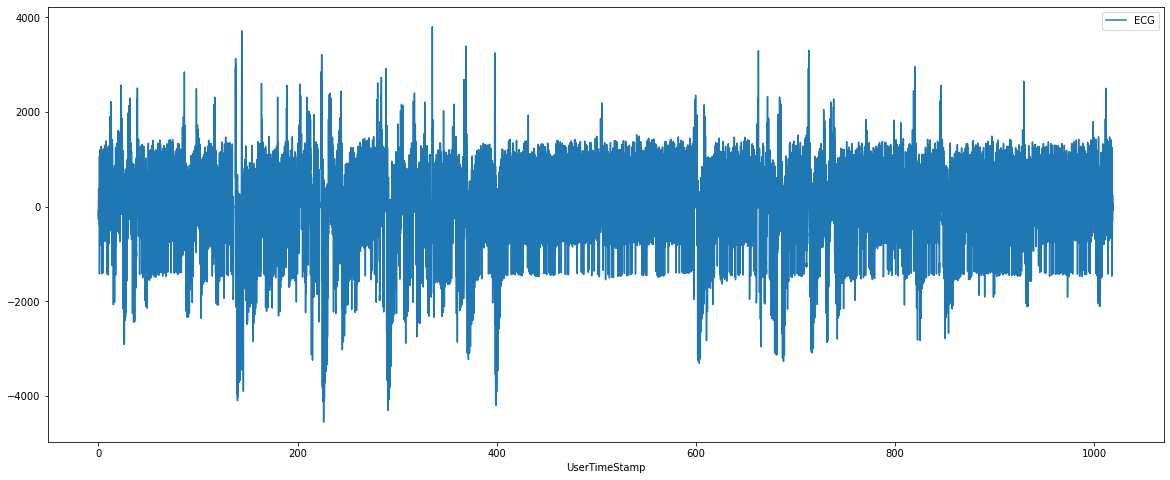

In [15]:
ecg.plot(figsize=(20,8))

### Looking at initial identification of Heart Rate Signal with additional information as output (0 - 5 min)

C:\Users\tfettrow\Anaconda3\lib\site-packages\heartpy\visualizeutils.py:119: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


bpm: 112.888715
ibi: 531.496881
sdnn: 147.609660
sdsd: 107.131740
rmssd: 203.141926
pnn20: 1.000000
pnn50: 0.875000
hr_mad: 88.461538
sd1: 135.409317
sd2: 102.406668
s: 43563.890261
sd1/sd2: 1.322271
breathingrate: 0.203552


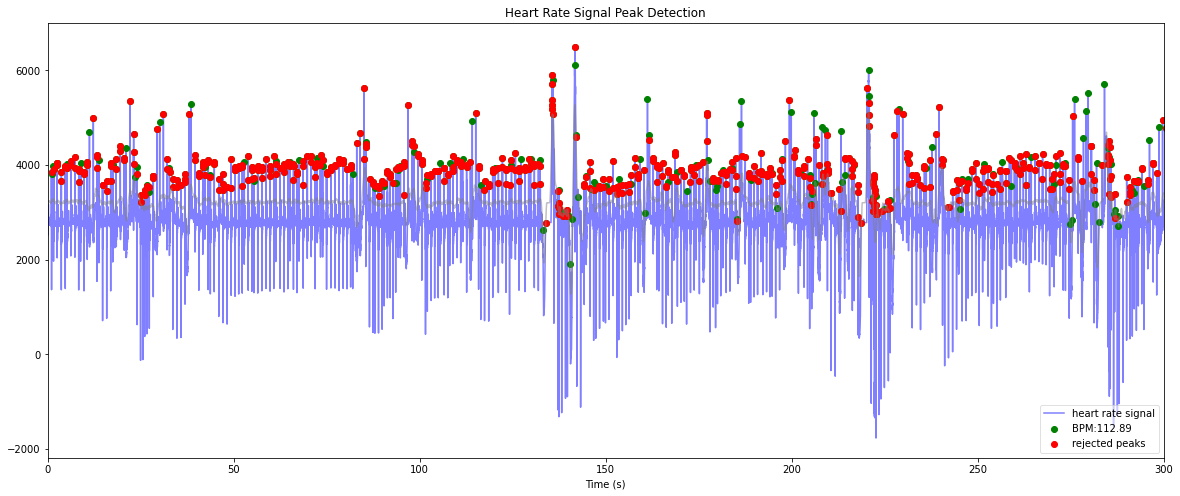

In [16]:
sample_rate = 260

hrdata = hp.get_data(file, column_name='ECG')
wd, m = hp.process(hrdata, sample_rate)

hp.plotter(wd, m, figsize=(20,8), moving_average=True)
plt.xlim([0,300])

for measure in m.keys():
    print('%s: %f' %(measure, m[measure]))


### Taking a closer look at the first minute

bpm: 112.888715
ibi: 531.496881
sdnn: 147.609660
sdsd: 107.131740
rmssd: 203.141926
pnn20: 1.000000
pnn50: 0.875000
hr_mad: 88.461538
sd1: 135.409317
sd2: 102.406668
s: 43563.890261
sd1/sd2: 1.322271
breathingrate: 0.203552


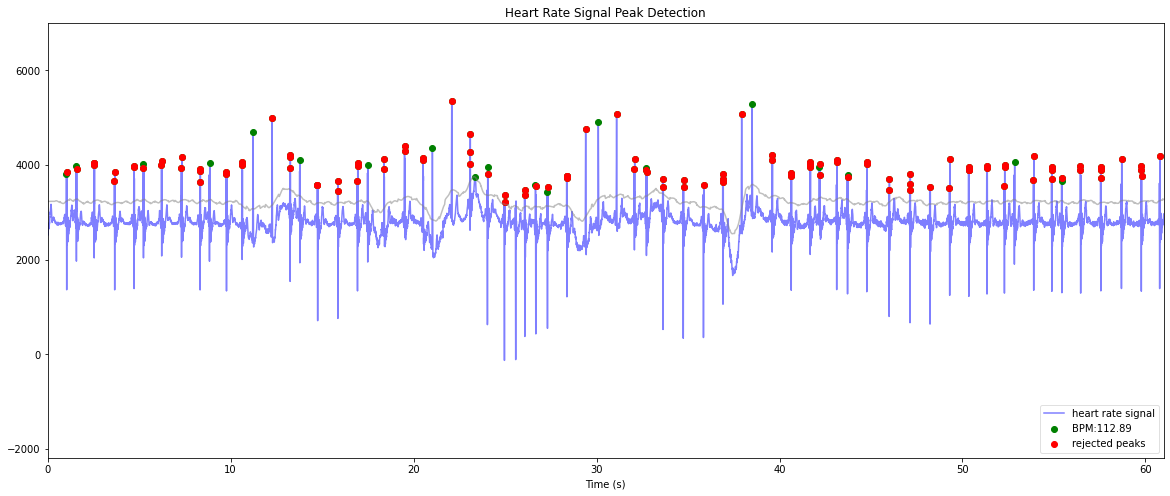

In [17]:
hp.plotter(wd, m, figsize=(20,8), moving_average=True)
plt.xlim([0,61])

for measure in m.keys():
    print('%s: %f' %(measure, m[measure]))

### An even closer look at 30 seconds to see how the function is identifying or rejecting peaks (0-30 sec)

C:\Users\sbastami\Anaconda3\lib\site-packages\heartpy\visualizeutils.py:119: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


(0.0, 30.0)

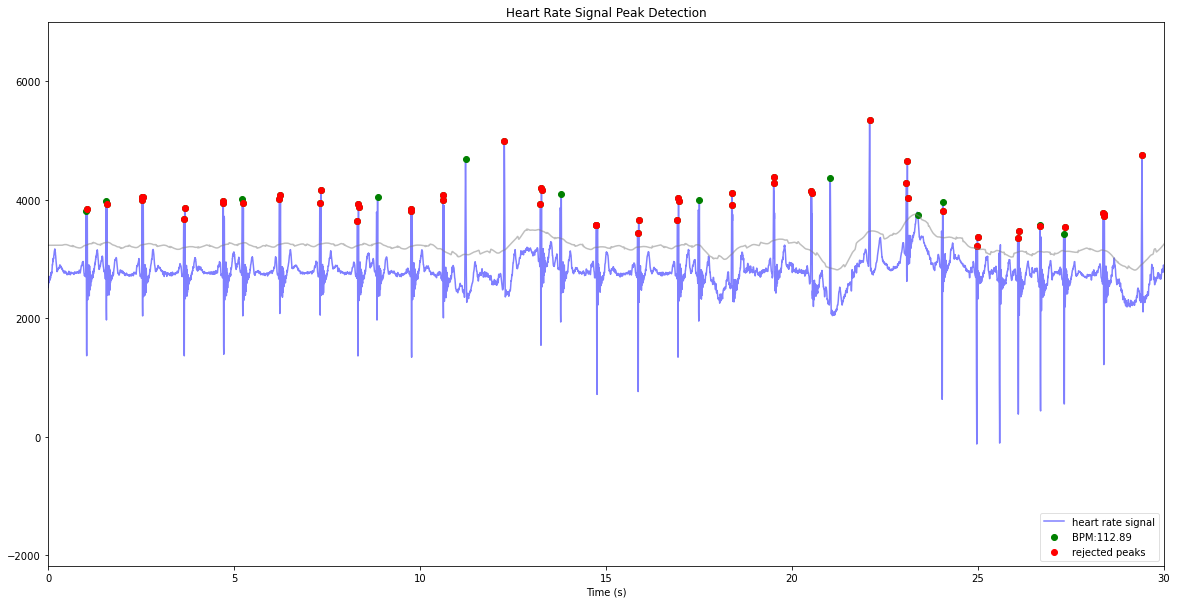

In [29]:
hp.plotter(wd, m, figsize=(20,10), moving_average=True)
plt.xlim([0,30])

## Signal Processing
### Exploring some signal processing and filteration from HeartPy to enhance ECG peaks
#### Number of Iterations = 1

In [10]:
filtered_ecg = hp.enhance_ecg_peaks(hrdata, sample_rate, iterations=1)

bpm: 95.705521
ibi: 626.923077
sdnn: 86.612030
sdsd: 0.000000
rmssd: 142.307692
pnn20: 1.000000
pnn50: 1.000000
hr_mad: 80.769231
sd1: 0.000000
sd2: 0.000000
s: 0.000000
sd1/sd2: nan
breathingrate: 0.177399


C:\Users\sbastami\Anaconda3\lib\site-packages\heartpy\visualizeutils.py:119: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


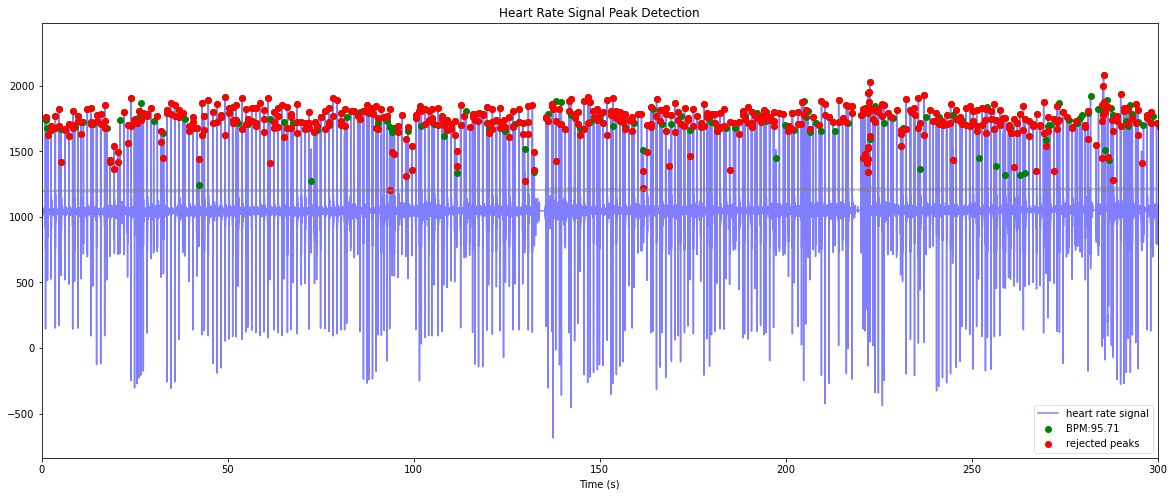

In [31]:
wd_filt, m_filt = hp.process(filtered_ecg, sample_rate)

hp.plotter(wd_filt, m_filt, figsize=(20,8), moving_average=True)
plt.xlim([0,300])

for measure in m.keys():
    print('%s: %f' %(measure, m_filt[measure]))

#### Upon enhancement, first observation is that the BPM has dropped to 95.71
#### Taking a closer look at the first 1 minute

C:\Users\sbastami\Anaconda3\lib\site-packages\heartpy\visualizeutils.py:119: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


(0.0, 60.0)

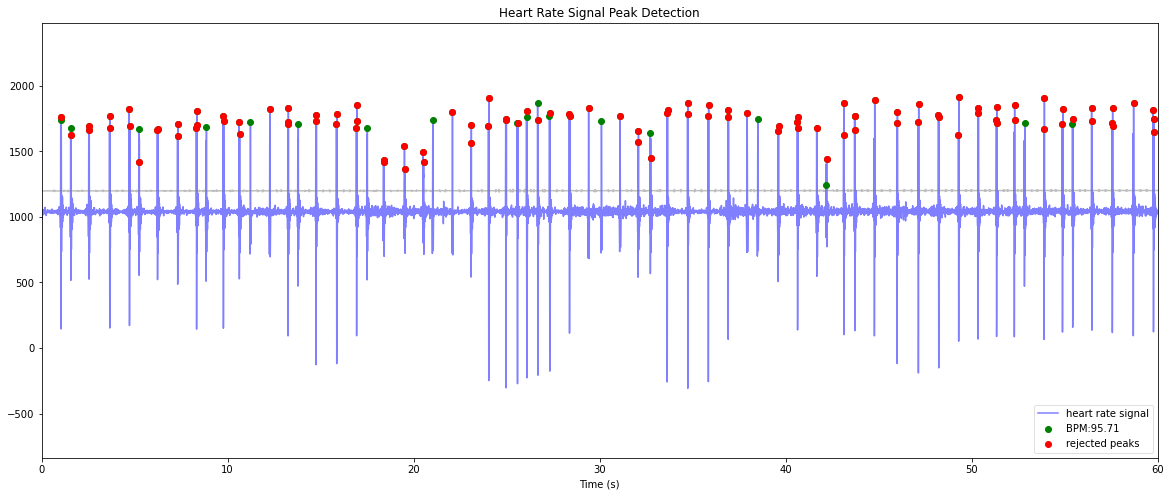

In [32]:
hp.plotter(wd_filt, m_filt, figsize=(20,8), moving_average=True)
plt.xlim([0,60])

#### Closer look at first 30 seconds

C:\Users\sbastami\Anaconda3\lib\site-packages\heartpy\visualizeutils.py:119: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


(28.0, 28.5)

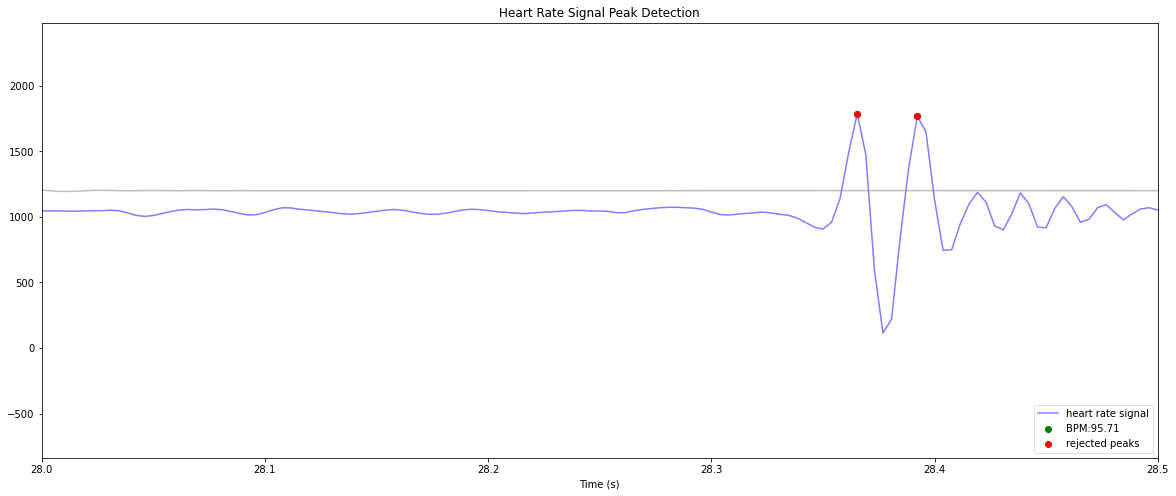

In [42]:
hp.plotter(wd_filt, m_filt, figsize=(20,8), moving_average=True)
plt.xlim([28,28.5])

#### Iterations = 2

bpm: 103.539823
ibi: 579.487179
sdnn: 57.592506
sdsd: nan
rmssd: nan
pnn20: nan
pnn50: nan
hr_mad: 30.769231
sd1: nan
sd2: nan
s: nan
sd1/sd2: nan
breathingrate: nan


C:\Users\sbastami\Anaconda3\lib\site-packages\numpy\ma\core.py:5240: RuntimeWarning: Mean of empty slice.
  result = super(MaskedArray, self).mean(axis=axis,
C:\Users\sbastami\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3702: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\sbastami\Anaconda3\lib\site-packages\heartpy\visualizeutils.py:119: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\sbastami\AppData\Local\Temp\1/ipykernel_16132/846374099.py:9: UserWarning: Warning: converting a masked element to nan.
  print('%s: %f' %(measure, m_filt2[measure]))


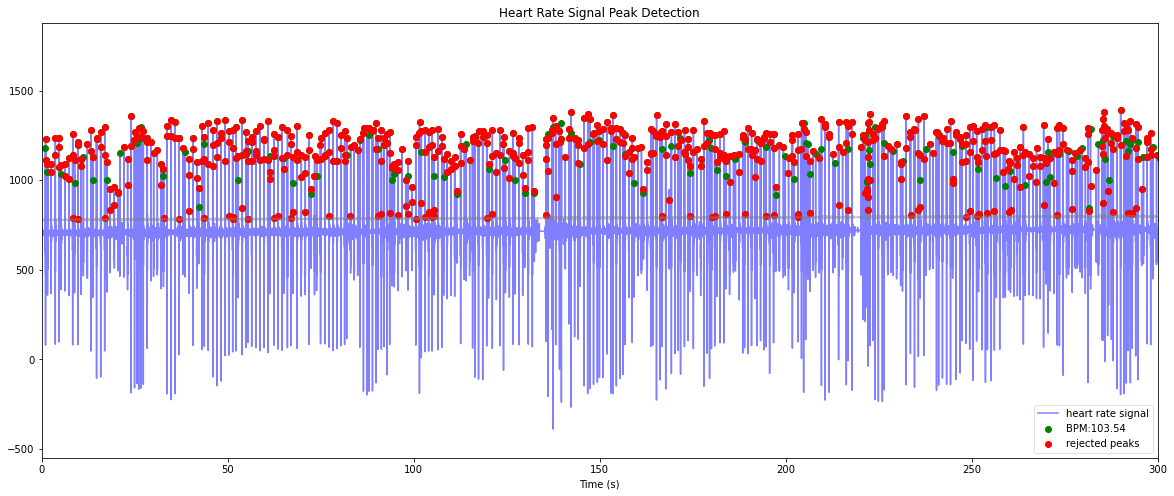

In [36]:
filtered_ecg2 = hp.enhance_ecg_peaks(hrdata, sample_rate, iterations=2)

wd_filt2, m_filt2 = hp.process(filtered_ecg2, sample_rate)

hp.plotter(wd_filt2, m_filt2, figsize=(20,8), moving_average=True)
plt.xlim([0,300])

for measure in m.keys():
    print('%s: %f' %(measure, m_filt2[measure]))

#### Iterations = 4

bpm: 229.411765
ibi: 261.538462
sdnn: 0.000000
sdsd: nan
rmssd: nan
pnn20: nan
pnn50: nan
hr_mad: 0.000000
sd1: nan
sd2: nan
s: nan
sd1/sd2: nan
breathingrate: nan


C:\Users\sbastami\Anaconda3\lib\site-packages\numpy\ma\core.py:5240: RuntimeWarning: Mean of empty slice.
  result = super(MaskedArray, self).mean(axis=axis,
C:\Users\sbastami\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3702: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\sbastami\Anaconda3\lib\site-packages\heartpy\visualizeutils.py:119: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\sbastami\AppData\Local\Temp\1/ipykernel_16132/3550499079.py:9: UserWarning: Warning: converting a masked element to nan.
  print('%s: %f' %(measure, m_filt4[measure]))


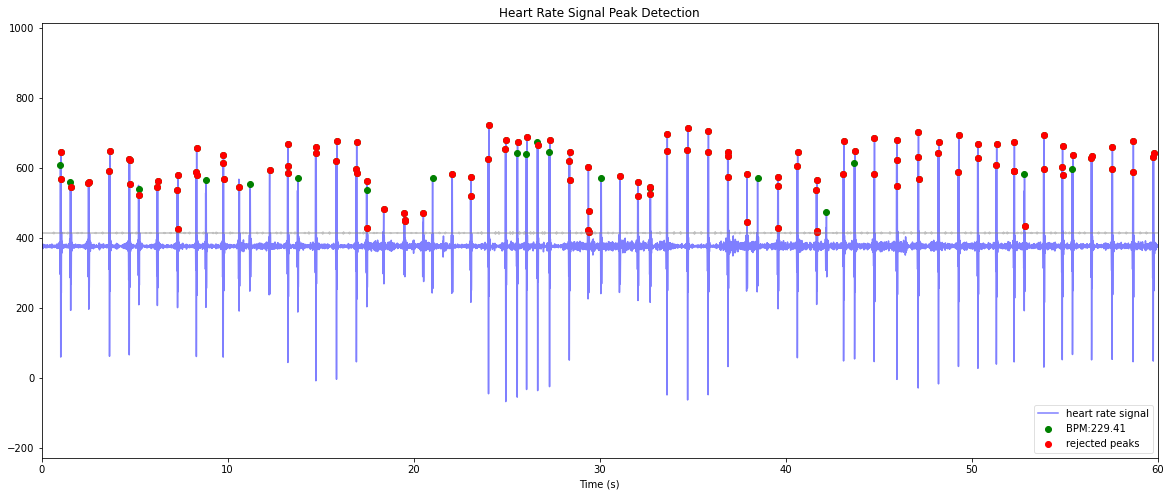

In [39]:
filtered_ecg4 = hp.enhance_ecg_peaks(hrdata, sample_rate, iterations=4)

wd_filt4, m_filt4 = hp.process(filtered_ecg4, sample_rate)

hp.plotter(wd_filt4, m_filt4, figsize=(20,8), moving_average=True)
plt.xlim([0,60])

for measure in m.keys():
    print('%s: %f' %(measure, m_filt4[measure]))

##### Observations:
The number of iterations strongly impacts the BPM indicated as 4 iterations results in a BPM of 229.4. It seems the average BPM seems to be around 100 BPM.
Will discuss the ideal number of iterations for signal filtration/processing.

### Plotting total scenario heart rates minute by minute for 1 Iteration